In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import matplotlib.pyplot as plt

from core.mades import MADE, MADE_MOG
from core.mafs import MAF, MAF_MOG

In [2]:
data = torch.from_numpy(np.load("./2d_data/U3_gmm_samples.npy"))

In [42]:
model = "maf-mog"

In [43]:
np.arange(1, 10 + 1) - 1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
if model == "made":
    
    dist = MADE(2, [100, 100])
    dist.load_state_dict(torch.load("./saved/2d_density_estimation/u3_made.pth"))
    samples = dist.sample(10000).numpy()

elif model == "made-mog":
    
    dist = MADE_MOG(2, [100, 100], 10)
    dist.load_state_dict(torch.load("./saved/2d_density_estimation/u3_made_mog.pth"))
    samples = dist.sample(10000).numpy()
    
elif model == "maf":
    
    dist = MAF(2, [100, 100], 10)
    dist.load_state_dict(torch.load("./saved/2d_density_estimation/u3_maf.pth"))
    
    ms, vs = dist.get_ms_and_vs(data[:10000])
    
    samples = dist.sample(10000, ms=ms, vs=vs).numpy()

elif model == "maf-mog":
    
    dist = MAF_MOG(2, [100, 100], 10, 5)
    dist.load_state_dict(torch.load("./saved/2d_density_estimation/u3_maf_mog.pth"))
    
    ms, vs = dist.get_ms_and_vs(data[:10000])
    
    samples = dist.sample(10000, ms=ms, vs=vs).numpy()

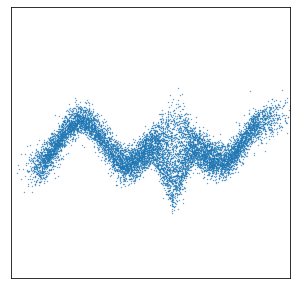

In [49]:
plt.figure(figsize=(5, 5))
plt.scatter(samples[:, 0], samples[:, 1], s=0.1)
plt.xticks([])
plt.yticks([])
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()